this report reviews the work of:Srinivasan, S., & Poonguzhali, S. (2020, July). Diabetes Prediction Using Machine Learning Techniques. In 2020 Fourth International Conference on I-SMAC (IoT in Social, Mobile, Analytics and Cloud)(I-SMAC) (pp. 595-599). IEEE. https://ieeexplore.ieee.org/abstract/document/9142959

# **1-Preprocessing**

In [1]:
!pip install xgboost
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=69eb4b862e7172aacbd41a8a2c3d66374f5e0ef81d8e9770169dc2e75136b1c8
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score
from imblearn.over_sampling import ADASYN
import xgboost as xgb
import lime
import lime.lime_tabular
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import ADASYN
import shap
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.inspection import PartialDependenceDisplay

In [4]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


# **2**-**feature selection**

In [6]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

In [11]:
x = pd.get_dummies(x, columns=['gender', 'smoking_history'], drop_first=True)

In [13]:
feature_names = x.columns.tolist()
print("Features after dummy encoding:", feature_names)

Features after dummy encoding: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_1', 'gender_2', 'smoking_history_1', 'smoking_history_2', 'smoking_history_3', 'smoking_history_4', 'smoking_history_5']


# **3**- **machine learning models building**

**
Abdelrahman Khaled
in the paper that i work on , they have used two models : Logistic regression and SVM ,so i will test their claim**

In [24]:
from sklearn.model_selection import train_test_split

In [20]:
mm_sc = MinMaxScaler()
x_non_neg = mm_sc.fit_transform(x)
selector = SelectKBest(score_func=chi2, k=4)
X_selected = selector.fit_transform(x_non_neg, y)

In [21]:
selected_indices = selector.get_support(indices=True)
selected_feature_names = [feature_names[i] for i in selected_indices]
print("Selected features:", selected_feature_names)

Selected features: ['hypertension', 'heart_disease', 'HbA1c_level', 'blood_glucose_level']


In [23]:
ndf = pd.DataFrame(X_selected, columns=selected_feature_names)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(ndf, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train)
X_test_np = scaler.transform(X_test)

In [28]:
model1 = GaussianNB()
model1.fit(X_train_np, y_train)

GaussianNB()

In [29]:
y_pred = model1.predict(X_test_np)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.9078
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     18292
           1       0.47      0.58      0.52      1708

    accuracy                           0.91     20000
   macro avg       0.71      0.76      0.73     20000
weighted avg       0.92      0.91      0.91     20000

ROC-AUC: 0.7579725412012571


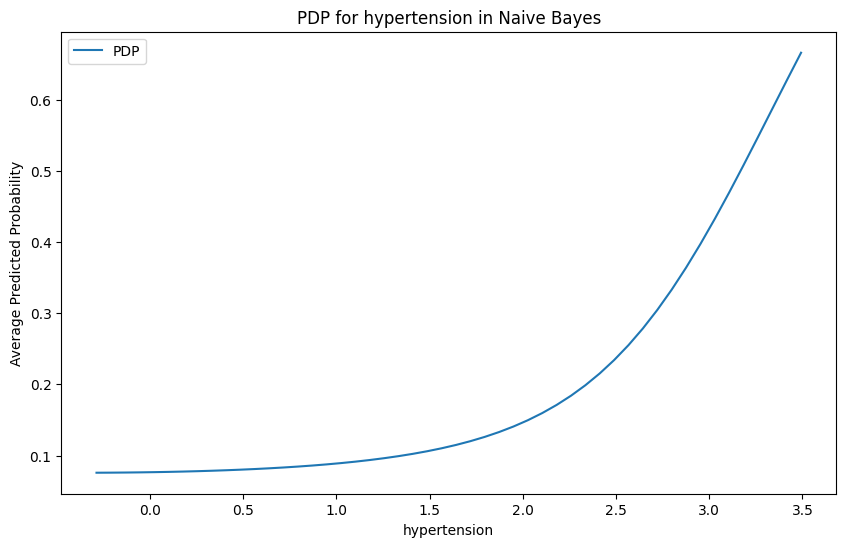

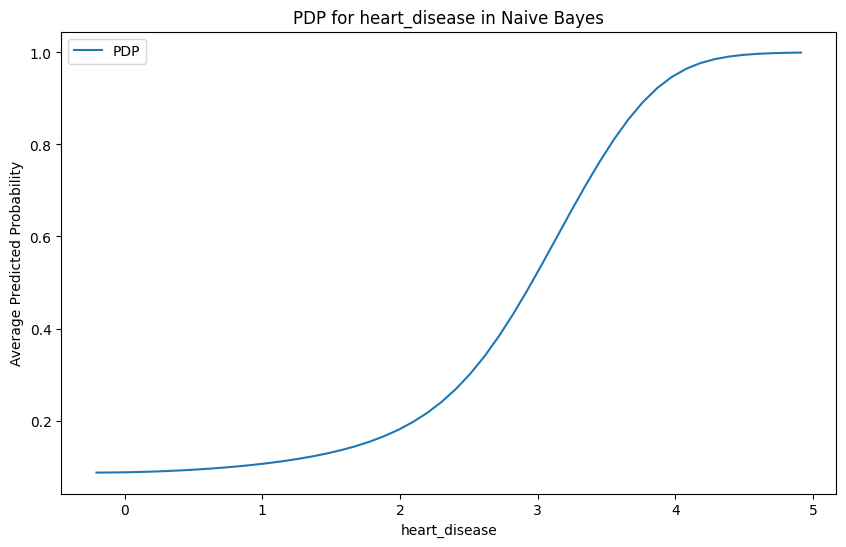

In [45]:
for feature_idx in [0, 1]:
    fig, ax = plt.subplots(figsize=(10, 6))
    feature_values = X_train_np[:, feature_idx]
    grid = np.linspace(np.min(feature_values), np.max(feature_values), 50)
    pd_values = []
    for val in grid:
        X_temp = X_train_np.copy()
        X_temp[:, feature_idx] = val
        preds = model1.predict_proba(X_temp)[:, 1]
        pd_values.append(np.mean(preds))

    ax.plot(grid, pd_values, label='PDP')
    ax.set_xlabel(selected_feature_names[feature_idx])
    ax.set_ylabel('Average Predicted Probability')
    ax.set_title(f"PDP for {selected_feature_names[feature_idx]} in Naive Bayes")
    ax.legend()
    plt.show()

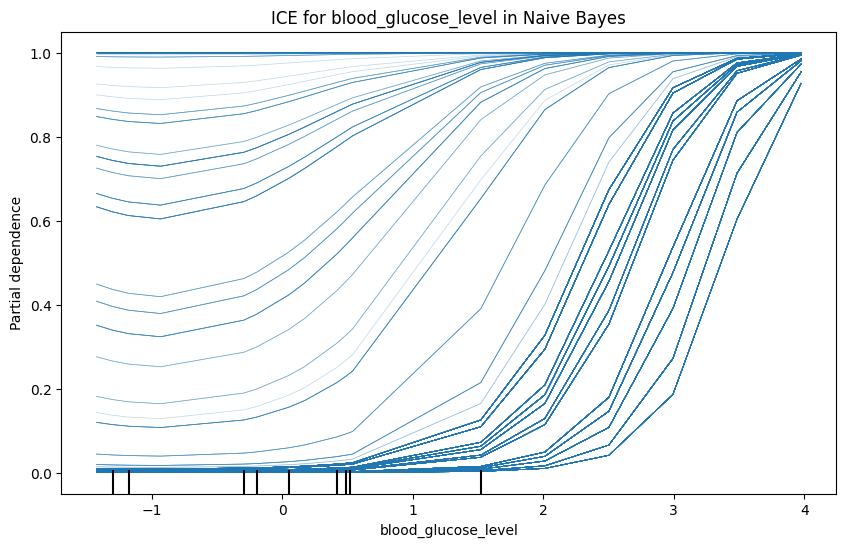

In [33]:
glucose_idx = selected_feature_names.index('blood_glucose_level') if 'blood_glucose_level' in selected_feature_names else 0
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    model1,
    X_train_np,
    features=[glucose_idx],
    feature_names=selected_feature_names,
    kind='individual',
    ax=ax,
    grid_resolution=50
)
plt.title(f"ICE for {selected_feature_names[glucose_idx]} in Naive Bayes")
plt.show()

Top features by Z-score:
               Feature    Z-score  Abs_Z-score
4  blood_glucose_level  69.069876    69.069876
3          HbA1c_level  62.791071    62.791071
1         hypertension  29.159057    29.159057
2        heart_disease  23.898787    23.898787


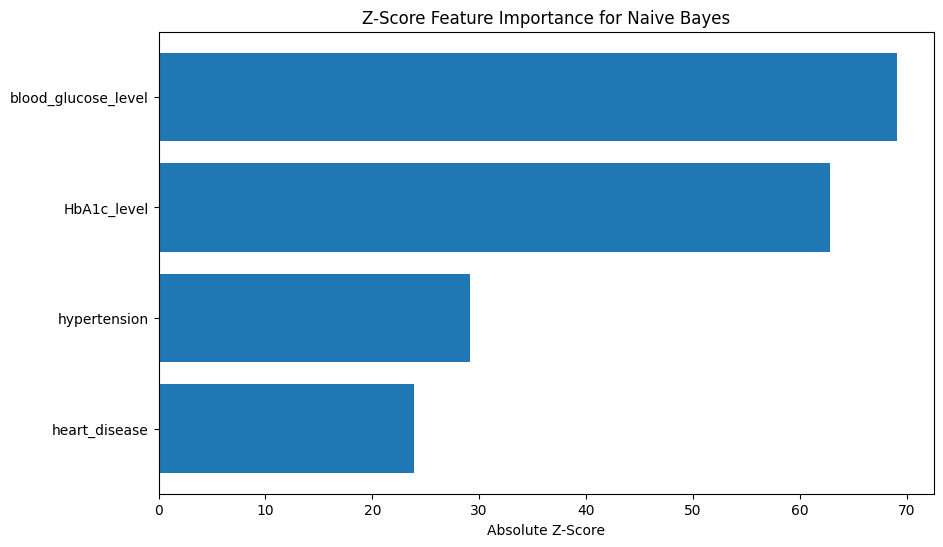

In [56]:
X_train_np_with_const = sm.add_constant(X_train_np)
logit_model = sm.Logit(y_train, X_train_np_with_const)
result = logit_model.fit(disp=0)

z_scores = result.params / result.bse
z_score_df = pd.DataFrame({
    'Feature': ['const'] + selected_feature_names,
    'Z-score': z_scores.values,
    'Abs_Z-score': np.abs(z_scores.values)
})
z_score_df = z_score_df[z_score_df['Feature'] != 'const']
z_score_df = z_score_df.sort_values('Abs_Z-score', ascending=False)
print("Top features by Z-score:")
print(z_score_df)

plt.figure(figsize=(10, 6))
plt.barh(z_score_df['Feature'], z_score_df['Abs_Z-score'])
plt.xlabel('Absolute Z-Score')
plt.title('Z-Score Feature Importance for Naive Bayes')
plt.gca().invert_yaxis()
plt.show()

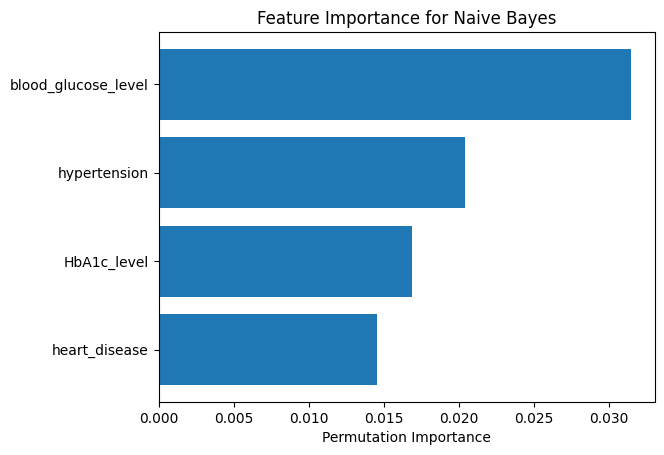

In [37]:
perm_importance = permutation_importance(model1, X_test_np, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(np.array(selected_feature_names)[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance for Naive Bayes")
plt.show()